# Import library (Basic)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("diabetes.csv")

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Correlation

In [37]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Data Preprocessing

In [38]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [39]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train - Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [43]:
from collections import Counter

In [44]:
print(f'Banyak train: {Counter(y_train)}')
print(f'Banyak test: {Counter(y_test)}')

Banyak train: Counter({0: 405, 1: 209})
Banyak test: Counter({0: 95, 1: 59})


## Scaling `[0,1]`

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

In [47]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [48]:
(X_train, X_test)

(array([[0.        , 0.81407035, 0.62295082, ..., 0.7928465 , 0.29077711,
         0.06666667],
        [0.11764706, 0.43718593, 0.        , ..., 0.43070045, 0.29675491,
         0.06666667],
        [0.        , 0.68844221, 0.55737705, ..., 0.36959762, 0.02775406,
         0.        ],
        ...,
        [0.17647059, 0.58291457, 0.60655738, ..., 0.39195231, 0.01238258,
         0.05      ],
        [0.05882353, 0.44221106, 0.24590164, ..., 0.81967213, 0.17847993,
         0.08333333],
        [0.29411765, 0.48241206, 0.60655738, ..., 0.50074516, 0.39239966,
         0.36666667]]),
 array([[0.23529412, 0.77386935, 0.59016393, ..., 0.46646796, 0.11101623,
         0.26666667],
        [0.11764706, 0.56281407, 0.70491803, ..., 0.57228018, 0.07173356,
         0.11666667],
        [0.05882353, 0.67839196, 0.44262295, ..., 0.39791356, 0.26003416,
         0.68333333],
        ...,
        [0.47058824, 0.42713568, 0.45081967, ..., 0.36363636, 0.02476516,
         0.35      ],
        [0.2

# Deep Neural Network

In [49]:
X.shape

(768, 8)

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 42        
Total params: 1,637
Trainable params: 1,637
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras.callbacks import ModelCheckpoint
import os

In [54]:
checkpoint_path = "./Hasil Model/cp-{epoch:04d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    checkpoint_path, verbose = 1, save_weights_only = True,
    save_freq = 'epoch'
)

In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
history = model.fit(X_train,y_train,validation_split=0.15, epochs = 50, batch_size = 16, verbose=1, callbacks = [cp_callback])

Epoch 1/50
 1/33 [..............................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6875
Epoch 00001: saving model to ./Hasil Model\cp-0001.hdf5
33/33 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6603 - val_loss: 0.6513 - val_accuracy: 0.6559
Epoch 2/50
32/33 [============================>.] - ETA: 0s - loss: 0.6375 - accuracy: 0.6582
Epoch 00002: saving model to ./Hasil Model\cp-0002.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6603 - val_loss: 0.6349 - val_accuracy: 0.6559
Epoch 3/50
27/33 [=======================>......] - ETA: 0s - loss: 0.6159 - accuracy: 0.6690
Epoch 00003: saving model to ./Hasil Model\cp-0003.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.6603 - val_loss: 0.6185 - val_accuracy: 0.6667
Epoch 4/50
 1/33 [..............................] - ETA: 0s - loss: 0.6312 - accuracy: 0.6875
Epoch 00004: saving model to ./Hasil Model\cp-0004.hdf5
33/33 [======

 1/33 [..............................] - ETA: 0s - loss: 0.5510 - accuracy: 0.7500
Epoch 00030: saving model to ./Hasil Model\cp-0030.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7927 - val_loss: 0.5301 - val_accuracy: 0.7634
Epoch 31/50
 1/33 [..............................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8750
Epoch 00031: saving model to ./Hasil Model\cp-0031.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7965 - val_loss: 0.5544 - val_accuracy: 0.7204
Epoch 32/50
 1/33 [..............................] - ETA: 0s - loss: 0.5749 - accuracy: 0.6875
Epoch 00032: saving model to ./Hasil Model\cp-0032.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7946 - val_loss: 0.5297 - val_accuracy: 0.7527
Epoch 33/50
 1/33 [..............................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8125
Epoch 00033: saving model to ./Hasil Model\cp-0033.hdf5
33/33 [==============

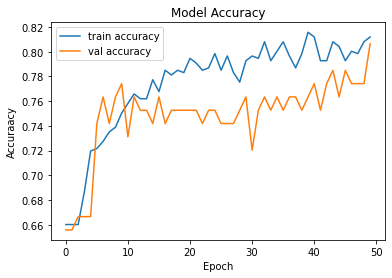

In [57]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

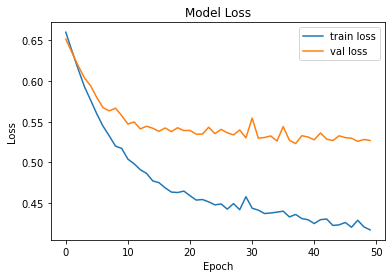

In [58]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [59]:
pred = np.argmax(model.predict(X_test),axis=1)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        95
           1       0.71      0.54      0.62        59

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



# Kasus Klasifikasi Gambar Covid-19

In [62]:
import cv2

In [63]:
train_covid = 'Covid19-dataset/train/Covid'
train_normal = 'Covid19-dataset/train/Normal'
train_pneumonia = 'Covid19-dataset/train/Viral Pneumonia'

test_covid = 'Covid19-dataset/test/Covid'
test_normal = 'Covid19-dataset/test/Normal'
test_pneumonia = 'Covid19-dataset/test/Viral Pneumonia'

## Load Train Data

In [64]:
covid_train = []
covid_label = np.ones(len(os.listdir(train_covid)))

for i in os.listdir(train_covid):
    img = cv2.imread(train_covid + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    covid_train.append(img)

In [65]:
normal_train = []
normal_label = np.zeros(len(os.listdir(train_normal)))

for i in os.listdir(train_normal):
    img = cv2.imread(train_normal + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    normal_train.append(img)

In [66]:
pneumonia_train = []
pneumonia_label = np.full(len(os.listdir(train_pneumonia)),2)

for i in os.listdir(train_pneumonia):
    img = cv2.imread(train_pneumonia + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    pneumonia_train.append(img)

## Load Data Test

In [67]:
covid_test = []
covid_label_test = np.ones(len(os.listdir(test_covid)))

for i in os.listdir(test_covid):
    img = cv2.imread(test_covid + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    covid_test.append(img)

In [68]:
normal_test = []
normal_label_test = np.zeros(len(os.listdir(test_normal)))

for i in os.listdir(test_normal):
    img = cv2.imread(test_normal + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    normal_test.append(img)

In [69]:
pneumonia_test = []
pneumonia_label_test = np.full(len(os.listdir(test_pneumonia)),2)

for i in os.listdir(test_pneumonia):
    img = cv2.imread(test_pneumonia + '/' + i)
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    img = img / 255
    pneumonia_test.append(img)

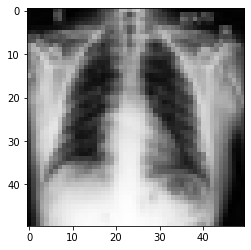

In [70]:
plt.imshow(covid_train[0])

# Construct Data

In [71]:
X_train = np.concatenate((covid_train, normal_train, pneumonia_train), axis = 0)
y_train = np.concatenate((covid_label, normal_label, pneumonia_label), axis = 0)

In [72]:
len(y_train)

251

In [73]:
X_test = np.concatenate((covid_test, normal_test, pneumonia_test), axis = 0)
y_test = np.concatenate((covid_label_test, normal_label_test, pneumonia_label_test), axis = 0)

In [74]:
len(y_test)

66

In [75]:
X_train.shape

(251, 50, 50, 3)

In [76]:
X_test.shape

(66, 50, 50, 3)

# CNN

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [78]:
models = Sequential()

models.add(Conv2D(filters = 16, kernel_size = (4,4), activation = 'relu', input_shape = (50,50,3)))
models.add(MaxPool2D(pool_size = (2,2)))
models.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
models.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

models.add(Flatten())

models.add(Dense(256, activation = 'relu'))
models.add(Dense(3, activation = 'softmax'))

In [79]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [80]:
models.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history1 = models.fit(X_train, y_train, epochs = 50, validation_split = 0.1, batch_size = 10)

Epoch 1/50
23/23 [==============================] - 1s 28ms/step - loss: 0.9301 - accuracy: 0.5911 - val_loss: 0.9422 - val_accuracy: 0.6923
Epoch 2/50
23/23 [==============================] - 0s 20ms/step - loss: 0.4083 - accuracy: 0.8667 - val_loss: 0.6326 - val_accuracy: 0.7308
Epoch 3/50
23/23 [==============================] - 0s 20ms/step - loss: 0.2944 - accuracy: 0.8800 - val_loss: 0.3941 - val_accuracy: 0.8462
Epoch 4/50
23/23 [==============================] - 0s 21ms/step - loss: 0.2021 - accuracy: 0.9244 - val_loss: 0.2552 - val_accuracy: 0.8846
Epoch 5/50
23/23 [==============================] - 1s 22ms/step - loss: 0.2065 - accuracy: 0.9200 - val_loss: 0.2475 - val_accuracy: 0.9231
Epoch 6/50
23/23 [==============================] - 0s 20ms/step - loss: 0.1612 - accuracy: 0.9422 - val_loss: 0.5995 - val_accuracy: 0.8462
Epoch 7/50
23/23 [==============================] - 0s 21ms/step - loss: 0.1329 - accuracy: 0.9467 - val_loss: 0.2192 - val_accuracy: 0.8846
Epoch 8/50
23

In [82]:
pred1 = np.argmax(models.predict(X_test), axis = 1)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0],
      dtype=int64)

In [83]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        20
         1.0       0.96      0.96      0.96        26
         2.0       0.85      0.85      0.85        20

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66

